# Training Models

In [120]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [121]:
%matplotlib inline

### Linear Regression

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

##### The Normal Equation

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.0130992 ],
       [ 2.81841715]])

In [18]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print X_new_b, '\n', y_predict

[[ 1.  0.]
 [ 1.  2.]] 
[[ 4.0130992 ]
 [ 9.64993351]]


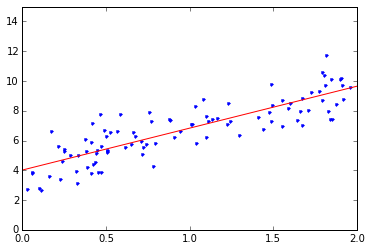

In [15]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

[ 4.0130992] [[ 2.81841715]]


array([[ 4.0130992 ],
       [ 9.64993351]])

### Gradient Descent

In [27]:
# quick implementation of Batch Gradient Descent algorithm
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) # random initialization
for iteration in range(n_iterations):
    gradients = 2.0 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [28]:
theta

array([[ 4.0130992 ],
       [ 2.81841715]])

In [34]:
# Stochastic Gradient Descent using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
m = 100
def learning_schedule(t):
    return float(t0)/(t + t1)
theta = np.random.randn(2, 1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [35]:
theta

array([[ 4.01080896],
       [ 2.8045256 ]])

In [37]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [38]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.0344188]), array([ 2.83573728]))

In [40]:
y.ravel()

array([  6.61560952,   9.25035869,   7.32541517,   5.92723142,
         8.29425449,   5.57086496,   3.15837658,   7.13872028,
         7.90012743,   9.5670014 ,   6.22087657,   7.65174169,
         3.8671359 ,   3.90071938,   7.42555785,   4.61833664,
         8.52516066,   3.85397123,   6.56468442,   6.61323419,
         4.27277749,   6.31026892,   7.44335819,   4.41651137,
        10.15327551,   5.83402064,   2.78928594,   5.54299812,
         6.12327907,   7.3003617 ,   2.71641765,  10.10373873,
         5.76644737,   7.77216891,   7.29645834,   8.76905967,
         6.20671623,   4.21016367,   5.30042533,   7.56478091,
         6.36269161,   7.46612596,  11.73064971,   7.38817056,
         7.32987251,   7.10727259,   3.82321861,   7.47015866,
         3.98327135,   5.98105069,   5.63692396,   5.73543332,
         6.62661176,   5.2654673 ,   8.41631818,   6.67388385,
         8.73982134,   5.6043668 ,   8.72291971,   7.95622349,
        10.6383077 ,   3.44684008,  10.17899748,   7.49

### Polynomial Regression

In [79]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

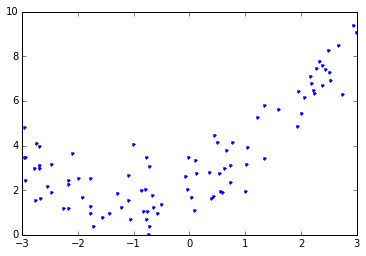

In [80]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.show()

In [81]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([ 0.49390593]), array([ 0.49390593,  0.24394307]))

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.91097781]), array([[ 1.04765689,  0.5153179 ]]))

### Learning Curves

In [83]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

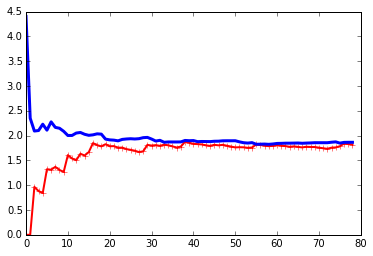

In [91]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

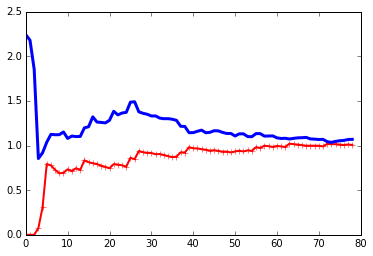

In [90]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y)

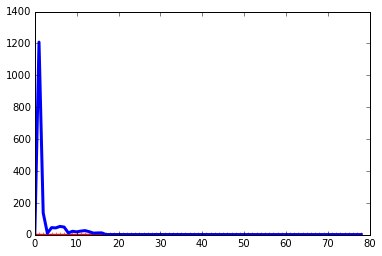

In [102]:
polynomial_regression = Pipeline((
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('sgd_reg', LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

### Regularized Linear Models

##### Ridge Regression

In [103]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.05405195]])

In [104]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 4.03151048])

##### Lasso Regression
An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features, i.e. set them to zero.  

In [106]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.00754777])

##### Elastic Net
mix of both Ridge and Lasso Regularization

In [108]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 5.0080487])

##### Early Stopping
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, 
                      learning_rate='constant', eta0=0.0005)
minimum_val_err = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_err:
        minimum_val_err = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

### Logistic Regression

In [115]:
iris = datasets.load_iris()
list(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [118]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-virginica, else 0

In [122]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

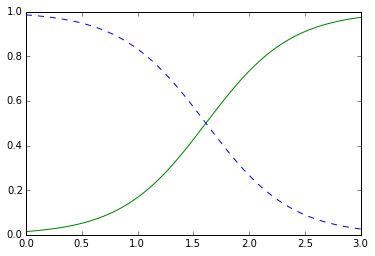

In [125]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')

In [127]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

##### Softmax Regression
The Logistic Regression model can be generalized to support multiple calsses directly, without having to train and combine multiple binary classifiers. This is call Softmax Regression, or Multinomial Logistic Regression 

In [128]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [130]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
softmax_reg.predict([[5, 2]])

array([2])

In [133]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])